# 미니 프로젝트: 반자동 문서 스캐너

## 마우스 이벤트 등록

In [3]:
import cv2

def mouse_handler(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼 Down
        print('왼쪽 버튼 Down')
        # 좌표 표시
        print(x, y)
    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼 Up
        print('왼쪽 버튼 Up')
        print(x, y)
    if event == cv2.EVENT_LBUTTONDBLCLK: # 마우스 왼쪽 버튼 double click 
        print('왼쪽 버튼 Double click')
    # elif event == cv2.EVENT_MOUSEMOVE: # 마우스 이동 
    #     print('마우스 이동')
    elif event == cv2.EVENT_RBUTTONDOWN: # 마우스 오른쪽 버튼 Down
        print('오른쪽 버튼 Down')

img = cv2.imread('jpg/poker.jpg')

# 마우스 이벤트 처리를 위한 핸들러 적용에 필요한 window창 정의
cv2.namedWindow('img') 

cv2.setMouseCallback('img', mouse_handler)

while True:    
    cv2.imshow('img', img)
    
    if cv2.waitKey(3) & 0xFF == ord('q'):
     break 
        
cv2.destroyAllWindows()
cv2.waitKey(1)


2025-01-12 15:15:51.667 python[57640:3280038] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-12 15:15:51.667 python[57640:3280038] +[IMKInputSession subclass]: chose IMKInputSession_Modern


왼쪽 버튼 Down
708 150
왼쪽 버튼 Up
708 150
왼쪽 버튼 Down
1129 415
왼쪽 버튼 Up
990 588
왼쪽 버튼 Down
724 1005
왼쪽 버튼 Up
724 1005
왼쪽 버튼 Down
286 699
왼쪽 버튼 Up
344 712
왼쪽 버튼 Down
970 705
왼쪽 버튼 Up
970 706


-1

## 더블클릭 동작 안할 시

In [69]:
import cv2
import time

last_click_time = 0  # 마지막 클릭 시간 기록

def mouse_handler(event, x, y, flags, param):
    global last_click_time
    if event == cv2.EVENT_LBUTTONDOWN:
        current_time = time.time()
        if current_time - last_click_time < 0.3:  # 300ms 이내의 연속 클릭
            print("Simulated Double Click", x, y)
        last_click_time = current_time

# 이미지 로드
img = cv2.imread("jpg/poker.jpg")

cv2.namedWindow("img")
cv2.setMouseCallback("img", mouse_handler)

while True:
    cv2.imshow("img", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cv2.waitKey(1)

## 프로젝트(반자동 스캐너)

In [72]:
import cv2
import numpy as np

# 전역 변수 정의
point_list = []
src_img = cv2.imread('jpg/poker.jpg')
YELLOW = (80, 191, 246)
RED = (0, 0, 255)
THICKNESS = 3
drawing = False # 선을 그릴지 여부 판단

# 마우스 이벤트 핸들러 
def mouse_handler(event, x, y, flags, param):
    global drawing
    dst_img = src_img.copy()

    if event == cv2.EVENT_LBUTTONUP: # 왼쪽 버튼을 뗄 때
        # 선 그리기 시작
        drawing = True  
        point_list.append((x, y))

    if drawing:
        prev_point = None # 직선의 시작점
        
        # 클릭한 지점 이미지에 표시 
        for point in point_list:
            cv2.circle(dst_img, point, 3, RED, cv2.FILLED)
            cv2.circle(dst_img, point, 20, YELLOW, 2, cv2.LINE_AA) 

            if prev_point:
                cv2.line(dst_img, prev_point, point, RED, THICKNESS, cv2.LINE_AA)
            prev_point = point
        
        next_point = (x, y)
        if len(point_list) == 4:
            show_result() # 결과 출력
            next_point = point_list[0] # 첫 번째 클릭한 지점
            
        cv2.line(dst_img, prev_point, next_point, RED, THICKNESS, cv2.LINE_AA)
        
    cv2.imshow('img', dst_img)

def show_result():
    width, height = 520, 710

    src = np.float32(point_list)
    dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # Output 4개 지점
    
    matrix = cv2.getPerspectiveTransform(src, dst) # Matrix 얻어옴
    result = cv2.warpPerspective(src_img, matrix, (width, height)) # matrix 대로 변환을 함
    cv2.imshow('result', result)

# 마우스 이벤트 처리를 위한 핸들러를 img란 이름의 윈도우로 미리 생성
cv2.namedWindow("img")
cv2.setMouseCallback("img", mouse_handler)
cv2.imshow("img", src_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 프로젝트(코드 품질 향상)

In [70]:
import cv2
import numpy as np

# 색상 및 선 두께 상수 정의
COLORS = {
    "point": (0, 0, 255),  # 빨간색 (점)
    "circle": (80, 191, 246)  # 노란색 (원)
}
THICKNESS = 3
POINT_RADIUS = 20

# 글로벌 변수
points = []
src_image = cv2.imread('jpg/poker.jpg')

# 마우스 이벤트 핸들러
def handle_mouse_event(event, x, y, flags, param):
    """마우스 이벤트 처리"""
    global points

    # 왼쪽 버튼 클릭 후 뗄 때 동작
    if event == cv2.EVENT_LBUTTONUP:
        points.append((x, y))

        # 4개 점이 선택되면 변환 결과 출력
        if len(points) == 4:
            draw_perspective_transform()

    # 선택된 점과 현재 마우스 위치를 포함한 이미지를 업데이트
    update_image_preview((x, y))

def update_image_preview(current_point=None):
    """이미지에 선택된 점, 선, 미완성 선을 그려 업데이트"""
    preview_image = src_image.copy()

    # 점 및 선 그리기
    prev_point = None
    for point in points:
        cv2.circle(preview_image, point, 3, COLORS["point"], cv2.FILLED)  # 점
        cv2.circle(preview_image, point, POINT_RADIUS, COLORS["circle"], 2, cv2.LINE_AA)  # 원
        if prev_point:
            cv2.line(preview_image, prev_point, point, COLORS["point"], THICKNESS, cv2.LINE_AA)
        prev_point = point

    # 미완성 선 그리기
    if current_point and points:
        cv2.line(preview_image, points[-1], current_point, COLORS["point"], THICKNESS, cv2.LINE_AA)

    # 닫힌 사각형 그리기
    if len(points) == 4:
        cv2.line(preview_image, points[-1], points[0], COLORS["point"], THICKNESS, cv2.LINE_AA)

    cv2.imshow("Image", preview_image)

def draw_perspective_transform():
    """선택한 4개 점으로 Perspective Transform 적용"""
    width, height = 520, 710
    destination_points = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32)
    source_points = np.float32(points)

    # 변환 행렬 계산 및 이미지 변환
    transform_matrix = cv2.getPerspectiveTransform(source_points, destination_points)
    transformed_image = cv2.warpPerspective(src_image, transform_matrix, (width, height))

    cv2.imshow("Transformed Image", transformed_image)

# 메인 함수
def main():
    """메인 실행 함수"""
    cv2.namedWindow("Image")
    cv2.setMouseCallback("Image", handle_mouse_event)
    cv2.imshow("Image", src_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

if __name__ == "__main__":
    main()

2025-01-12 16:14:47.017 python[57640:3280038] _TIPropertyValueIsValid called with 16 on nil context!
2025-01-12 16:14:47.017 python[57640:3280038] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-01-12 16:14:47.017 python[57640:3280038] Text input context does not respond to _valueForTIProperty:


## 마우스 클릭을 통한 이미지 좌표 정보 가져오기

In [1]:
import cv2

# 이미지 로드
image = cv2.imread('main.jpeg')  # 이미지 파일 경로

# 마우스 클릭 이벤트 함수
def get_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # 마우스 왼쪽 버튼 클릭
        print(f"Clicked coordinates: ({x}, {y})")

# 창 열기 및 마우스 이벤트 연결
cv2.imshow('Image', image)
cv2.setMouseCallback('Image', get_coordinates)

# 키 입력 대기
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2025-01-11 21:32:09.107 python[45736:2750635] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-11 21:32:09.107 python[45736:2750635] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Clicked coordinates: (685, 538)
Clicked coordinates: (997, 536)
Clicked coordinates: (998, 814)
Clicked coordinates: (685, 815)


2025-01-11 21:34:11.388 python[45736:2750635] _TIPropertyValueIsValid called with 16 on nil context!
2025-01-11 21:34:11.388 python[45736:2750635] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-01-11 21:34:11.388 python[45736:2750635] Text input context does not respond to _valueForTIProperty:


-1

In [ ]:
import cv2
import numpy as np

# Step 1: 이미지 불러오기
original_image = cv2.imread('main.jpeg')  # 대상 이미지 경로
new_qr_code = cv2.imread('qr_code.png')  # 교체할 QR 코드 이미지 경로

# Step 2: QR 코드 영역의 좌표 설정 (사용자가 제공한 좌표)
# 좌표: 시계 방향 (좌상, 우상, 우하, 좌하)
points = np.array([[680, 525], [1000, 525], [1000, 815], [680, 815]])

# Step 3: 새로운 QR 코드 크기를 원본 영역에 맞추기
# 원본 QR 코드 영역의 너비와 높이 계산
width = int(np.linalg.norm(points[1] - points[0]))  # 상단 너비
height = int(np.linalg.norm(points[2] - points[1]))  # 오른쪽 높이
resized_qr = cv2.resize(new_qr_code, (width, height))  # 새로운 QR 코드 크기 조정


# Step 4: QR 코드 영역에 새로운 QR 코드 삽입
# 원본 이미지에 QR 코드 삽입 (4개의 점 좌표를 기준으로)
dst_points = np.array([
    [680, 530],  # 좌상
    [680 + width, 530],  # 우상
    [680 + width, 530 + height],  # 우하
    [680, 530 + height]  # 좌하
], dtype="float32")

# 새로운 QR 코드의 4개 코너 정의
src_points = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype="float32")

# 변환 행렬 계산
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# QR 코드 변환
warped_qr = cv2.warpPerspective(resized_qr, matrix, (original_image.shape[1], original_image.shape[0]))

# 마스크 생성 및 QR 코드 삽입
mask = np.zeros_like(original_image, dtype=np.uint8)
cv2.fillConvexPoly(mask, dst_points.astype(int), (255, 255, 255))

# 원본 이미지에서 QR 코드 영역 제거
masked_image = cv2.bitwise_and(original_image, cv2.bitwise_not(mask))

# Step 5: QR 코드 주변 블러 효과 추가
blur_mask = cv2.GaussianBlur(warped_qr, (51, 51), 0)

# 흰 조명을 자연스럽게 조화시키기
blended_qr = cv2.addWeighted(warped_qr, 0.8, blur_mask, 0.2, 0)

# 최종 이미지 합성
result_image = cv2.add(masked_image, blended_qr)

# Step 6: 결과 이미지 저장 및 표시
cv2.imwrite('result_modified.jpg', result_image)
cv2.imshow('Modified Image', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

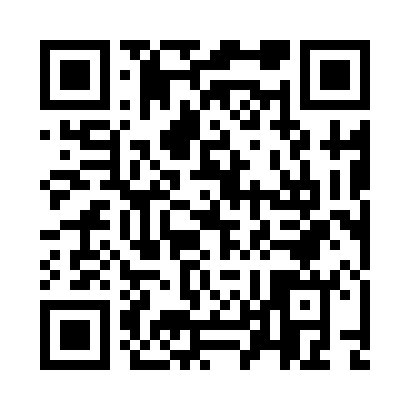

In [1]:
import qrcode
from IPython.display import Image

# QR 코드에 담을 URL
url = "http://c7d2408t1p1.itwillbs.com/"

# QR 코드 생성
qr = qrcode.QRCode(
    version=1,  # QR 코드 크기 (1~40), 숫자가 클수록 세부 정보 추가 가능
    error_correction=qrcode.constants.ERROR_CORRECT_H,  # 오류 복원 수준 (L, M, Q, H)
    box_size=10,  # QR 코드의 박스 크기
    border=4,  # 테두리 크기
)

# URL 데이터 추가
qr.add_data(url)
qr.make(fit=True)

# QR 코드 이미지 생성
qr_image = qr.make_image(fill_color="black", back_color="white")

# 파일 저장
output_path = "qr_code.png"  # 저장할 파일 이름
qr_image.save(output_path)

# Jupyter Notebook에서 QR 코드 이미지 표시
display(Image(output_path))

## 이미지 뒷 배경 지우기

In [26]:
import cv2
import numpy as np

# Step 1: 이미지 불러오기
image = cv2.imread('logo_text_white_opencv.png')  # 대상 이미지 파일 경로
image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)  # 알파 채널 추가

# Step 2: 흰색 배경 마스크 생성
lower_white = np.array([240, 240, 240, 0])  # 흰색의 하한값 (B, G, R, A)
upper_white = np.array([255, 255, 255, 255])  # 흰색의 상한값 (B, G, R, A)
mask = cv2.inRange(image, lower_white, upper_white)

# Step 3: 마스크 반전 및 알파 채널 수정
image[:, :, 3] = cv2.bitwise_not(mask)  # 알파 채널에 반전 마스크 적용

# Step 4: 결과 저장
cv2.imwrite('logo_no_bg_white_text.png', image)

print("배경이 제거된 이미지가 'logo_no_bg_white_text.png'로 저장되었습니다.")

배경이 제거된 이미지가 'logo_no_bg.png'로 저장되었습니다.


## 이미지 글자 색 바꾸기

In [24]:
import cv2
import numpy as np

# Step 1: 이미지 불러오기
image = cv2.imread('logo_no_bg.png')

# Step 2: HSV 변환 (특정 색상 영역 탐지)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_black = np.array([0, 0, 0])  # 검정색 범위 (하단)
upper_black = np.array([180, 255, 50])  # 검정색 범위 (상단)

# Step 3: 검정색 텍스트에 대한 마스크 생성
mask = cv2.inRange(hsv, lower_black, upper_black)

# Step 4: 마스크 영역의 색상 변경 (흰색)
image[mask > 0] = [239, 239, 239]  # 흰색으로 변경

# Step 5: 결과 저장 및 확인
cv2.imwrite('logo_text_white_opencv.png', image)
cv2.imshow('Modified Logo', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1